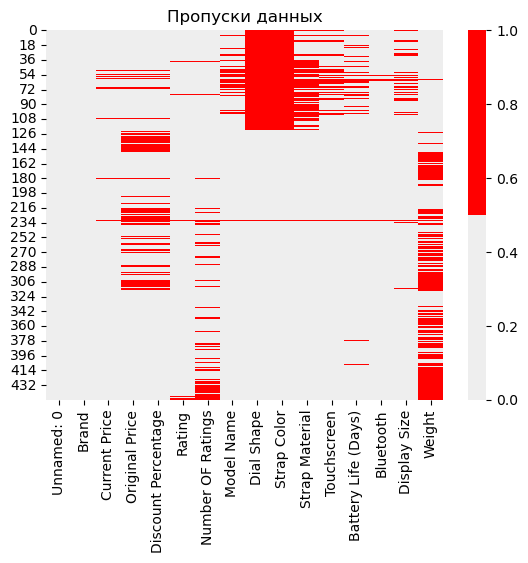

Пропуски данных по параметрам:
Unnamed: 0               0
Brand                    0
Current Price           10
Original Price          73
Discount Percentage     73
Rating                   6
Number OF Ratings       59
Model Name              35
Dial Shape             123
Strap Color            123
Strap Material          69
Touchscreen             37
Battery Life (Days)     32
Bluetooth                6
Display Size            30
Weight                 186
dtype: int64


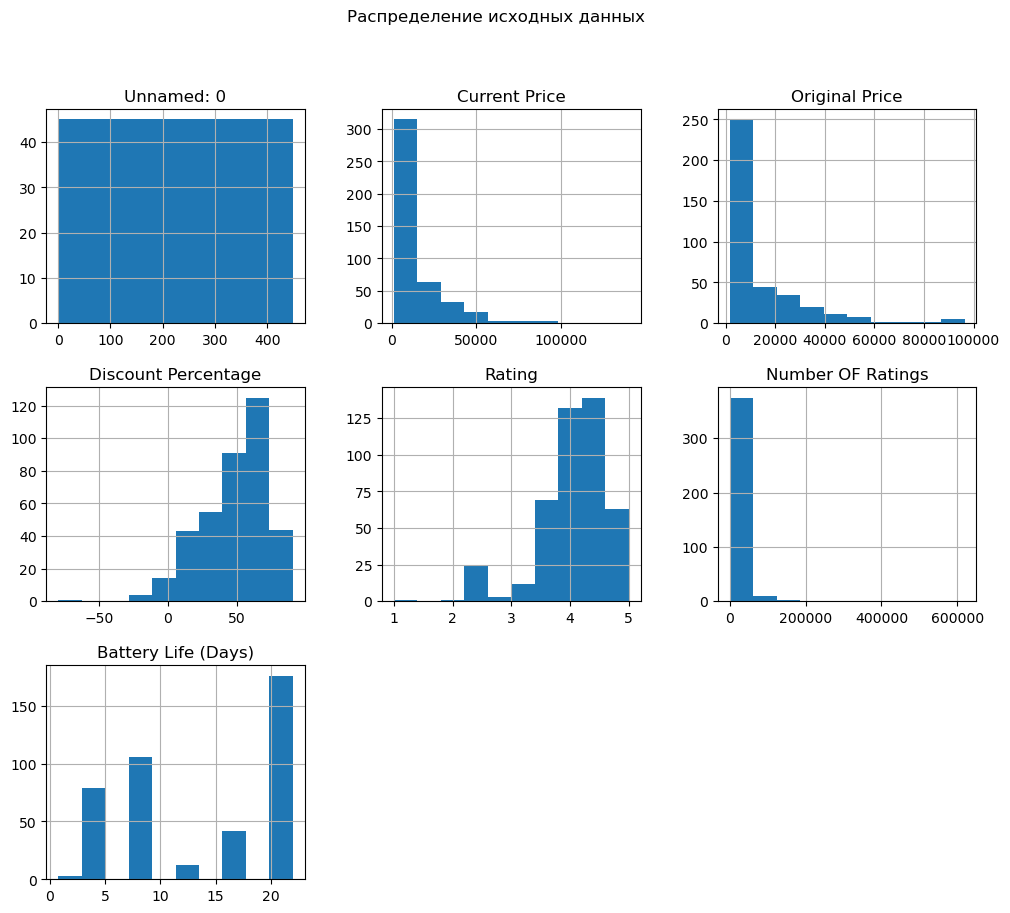

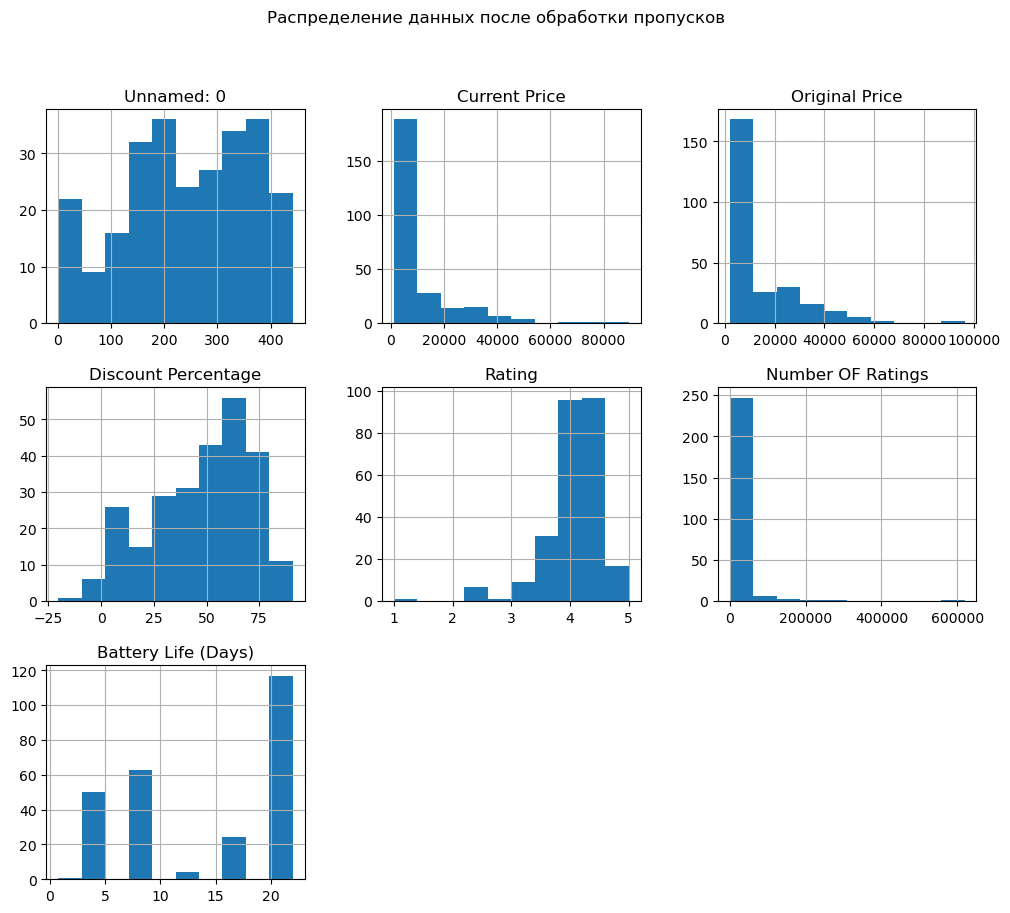

Столбец 'Original Price' до удаления выбросов:
count      259.000000
mean     14763.760618
std      14590.661385
min       1899.000000
25%       5999.000000
50%       7990.000000
75%      20494.500000
max      96390.000000
Name: Original Price, dtype: float64

Столбец 'Original Price' после удаления выбросов:
count      244.000000
mean     12166.872951
std       9690.070027
min       1899.000000
25%       5999.000000
50%       7499.000000
75%      17498.500000
max      41990.000000
Name: Original Price, dtype: float64

Столбец 'Original Price' до приведения к числовому виду:
float64

Столбец 'Original Price' после приведения к числовому виду:
float64


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка датасета
data = pd.read_csv("smartwatches.csv")

# 1. Выявление пропусков данных
# Визуальный способ
cols = data.columns[:]
colours = ['#eeeeee', '#ff0000']
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))
plt.title("Пропуски данных")
plt.show()

# Расчетный способ
missing_values = data.isnull().sum()
print("Пропуски данных по параметрам:")
print(missing_values)

data.hist(figsize=(12, 10))
plt.suptitle("Распределение исходных данных")
plt.show()
# 2. Исключение строк и столбцов с наибольшим количеством пропусков
threshold = len(data) * 0.75
data.dropna(thresh=threshold, axis=1, inplace=True)

data.dropna(axis=0, inplace=True)

# 3. Замена оставшихся пропусков на логически обоснованные значения
data.fillna(data.mean(numeric_only=True), inplace=True)

# 4. Построение гистограмм распределения до и после обработки пропусков
data.hist(figsize=(12, 10))
plt.suptitle("Распределение данных после обработки пропусков")
plt.show()

# 5. Проверка на выбросы и удаление аномальных записей
print("Столбец 'Original Price' до удаления выбросов:")
print(data['Original Price'].describe())

Q1_price = data['Original Price'].quantile(0.25)
Q3_price = data['Original Price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

data = data[(data['Original Price'] >= Q1_price - 1.5 * IQR_price) & (data['Original Price'] <= Q3_price + 1.5 * IQR_price)]

print("\nСтолбец 'Original Price' после удаления выбросов:")
print(data['Original Price'].describe())

# 6. Приведение всех параметров к числовому виду
print("\nСтолбец 'Original Price' до приведения к числовому виду:")
print(data['Original Price'].dtype)

data['Original Price'] = pd.to_numeric(data['Original Price'], errors='coerce')

print("\nСтолбец 'Original Price' после приведения к числовому виду:")
print(data['Original Price'].dtype)

# 7. Сохранение обработанного датасета
data.to_csv("processed_dataset.csv", index=False)
